# Natural Language Processing: Twitter US Airline Sentiment

## Problem Statement

### Context

Twitter's massive user base of 330 million monthly active users presents a direct avenue for businesses to connect with a broad audience. However, the vast amount of information on the platform makes it challenging for brands to swiftly detect negative social mentions that may impact their reputation. To tackle this, sentiment analysis has become a crucial tool in social media marketing, enabling businesses to monitor emotions in conversations, understand customer sentiments, and gain insights to stay ahead in their industry.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

### Objective

The aim of this project is to build a sentimental analysis model that classify the sentiment of tweets into the positive, neutral & negative.

### Data Dictionary

* tweet_id - A unique identifier for each tweet                                                          
* airline_sentiment - The sentiment label of the tweet, such as positive, negative, or neutral                                               
* airline_sentiment_confidence - The confidence level associated with the sentiment label                               
* negativereason - A category indicating the reason for negative sentiment                                                   
* negativereason_confidence - The confidence level associated with the negative reason                                    
*airline - The airline associated with the tweet                                                                   
* airline_sentiment_gold - Gold standard sentiment label                                               
* name - The username of the tweet author    
* retweet_count - The number of times the tweet has been retweeted
* text - The actual text content of the tweet.
* tweet_coord - Coordinates of the tweet
* tweet_created - The timestamp when the tweet was created
* tweet_location - The location mentioned in the tweet
* user_timezone - The timezone of the tweet author

## Importing necessary libraries

In [1]:
# install and import necessary libraries.
#!pip install contractions

# Import warnings, Regex, string, unicodedata, contractions and BeautifulSoup.
import warnings
import re, string, unicodedata                          
import contractions                                     
from bs4 import BeautifulSoup

# Suppress the warning message
warnings.filterwarnings("ignore", category=UserWarning)

# Import numpy, pandas, Natural Language Tool-Kit, seaborn, sklearn and Matplotlib.
import numpy as np                                      
import pandas as pd                                     
import nltk                                             
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
from keras.layers import LSTM
#import pickle
from sklearn import metrics

# Download Stopwords, punk and wordnet.
#nltk.download('stopwords')                              
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

# Import stopwords, Tokenizer, Lemmatizer, WorldCloud, Stopwords, count Vectorizer, train test split, Random Forest Classifier.
# Import cross val score, confusion matrix, Word Cloud, Tf-Idf vector and nltk.
from nltk.corpus import stopwords                                              
from nltk.tokenize import word_tokenize, sent_tokenize                         
from nltk.stem.wordnet import WordNetLemmatizer                                
from wordcloud import WordCloud,STOPWORDS                                      
from sklearn.feature_extraction.text import CountVectorizer                    
from sklearn.model_selection import train_test_split                           
from sklearn.ensemble import RandomForestClassifier                            
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score                            
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score                                    
from wordcloud import WordCloud                                                
from sklearn.feature_extraction.text import TfidfVectorizer                    
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import nltk                                                                    

# Import backend,Sequential,Embedding, random, tensorflow, Label Binarizer and Dropout. 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SpatialDropout1D
from tensorflow.keras import backend                                           
import random                                                                  
import tensorflow as tf                                                        
from sklearn.preprocessing import LabelBinarizer                                  
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model

## Loading the dataset

In [ ]:
# Mount Google drive to access the dataset only if you are using Google Colab
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# read the data
data = pd.read_csv("Tweets.csv")    

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.

### The head and tail of the data

In [3]:
data.head()                           # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.tail()                      # Print last 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


### The shape of the dataset

In [5]:
data.shape                       # print shape of data.

(14640, 15)

### Observation: 
There are 14640 rows & 15 features or columns

### Data types of the columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

#### Observation: 
There are 2 floats, 2 integers & 11 objects

### Missing Values

In [7]:
data.isnull().sum(axis=0)                            # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#### Observation: 
There are missing values in negativereason, negativereason_confidence, airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location & user_timezone  

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

- What is the percentage of tweets for each airline?
- What is the distribution of sentiments across all the tweets?
- What is the distribution of sentiments for each airline?
- What does the plot of negative reasons indicate?
- How does a wordcloud appear for negative tweets?
- How does a wordcloud appear for positive tweets?
- What are insights observed from EDA?

### Univariate Analysis

In [8]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=60, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

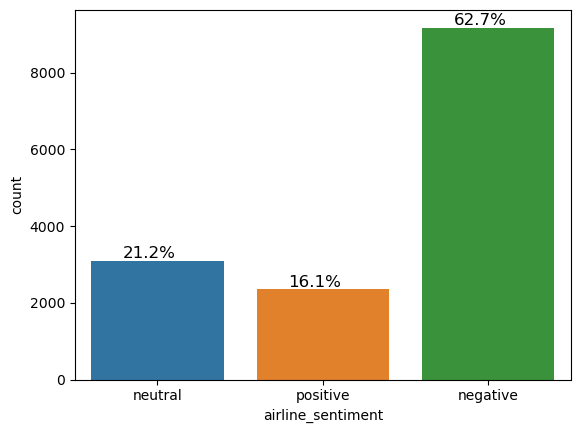

In [9]:
#plot the distribution of the class label
def bar_plot(data, feature):
    plot = sns.countplot(x =feature, data = data)
    total = len(data)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")
    plt.show()
    
bar_plot(data,'airline_sentiment')

#### Observation:
There are 62.7% negative tweets & only 16.1% positive tweets. The data is imbalance.

#### Percentage of tweets for each airline

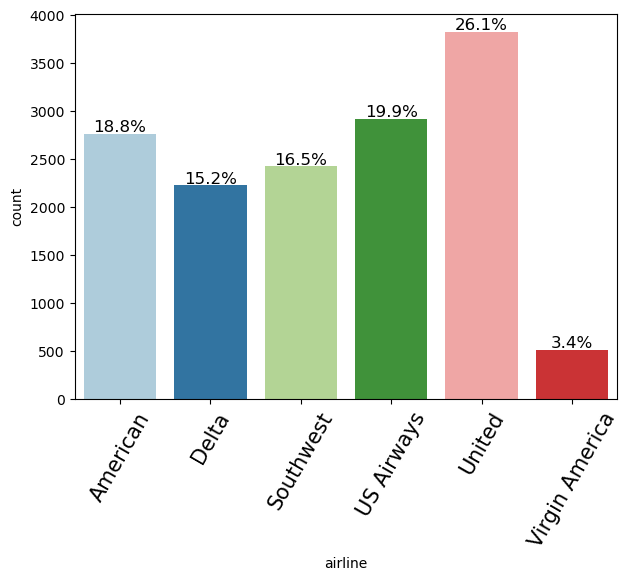

In [10]:
labeled_barplot(data, "airline", perc=True)

#### Observation:
There are 26.1% of tweets from United & only 3.4% tweets from Virgin America. The data is imbalance.

#### Distribution of sentiments across all the tweets

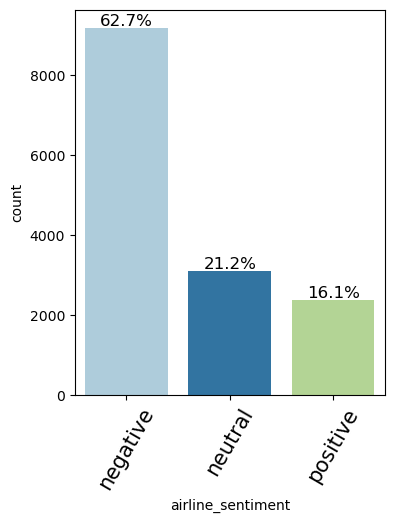

In [11]:
labeled_barplot(data,'airline_sentiment', perc=True)

#### Observation:
There are 62.7% negative tweets & only 16.1% positive tweets. The data is imbalance.

#### Plot of all the negative reasons

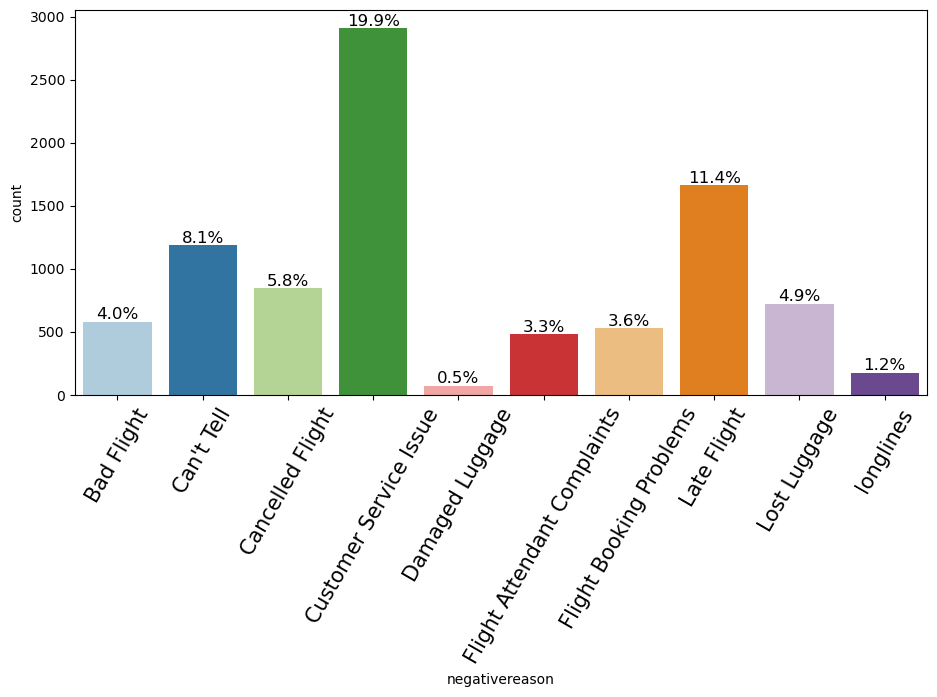

In [12]:
labeled_barplot(data, "negativereason", perc=True)

#### Observation:
There are 19.9% negative reason tweets from cancelled flights & only 0.5% negative reason tweets from Customer service issues. The data is imbalance.

### Bivariate Analysis

#### Distribution of Sentiment of tweets for each airline

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'American'),
  Text(1, 0, 'Delta'),
  Text(2, 0, 'Southwest'),
  Text(3, 0, 'US Airways'),
  Text(4, 0, 'United'),
  Text(5, 0, 'Virgin America')])

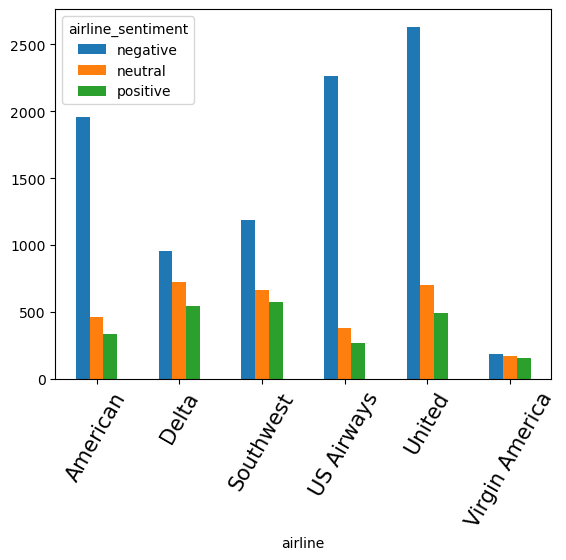

In [13]:
airline_sentiment =  data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()    # Complete the code to plot the barplot for the distribution of each airline with total sentiments
airline_sentiment.plot(kind='bar')
plt.xticks(rotation=60, fontsize=15)

#### Observation:
There are more than 2500 of negative tweets, almost 500 of positive tweets & less than 750 of neutral tweeta from United & less than 200 of negative, positive & neutral tweets from Virgin America. The data is imbalance.

#### Wordcloud for negative tweets

In [14]:
# Creating word cloud for negative tweets
# Extracting the negative tweets i.e, airline_sentiment = negative
airline_tweets=data[data['airline_sentiment']=='negative']
# joining the negative tweets using space seperator, helps to convert the all rows into one string
words = ' '.join(airline_tweets['text'])
# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                                and len(word)>1])

In [15]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords=STOPWORDS,
                      colormap = 'RdBu',
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)  # The generate() function takes one argument of the text we created, helps to generate the wordcloud

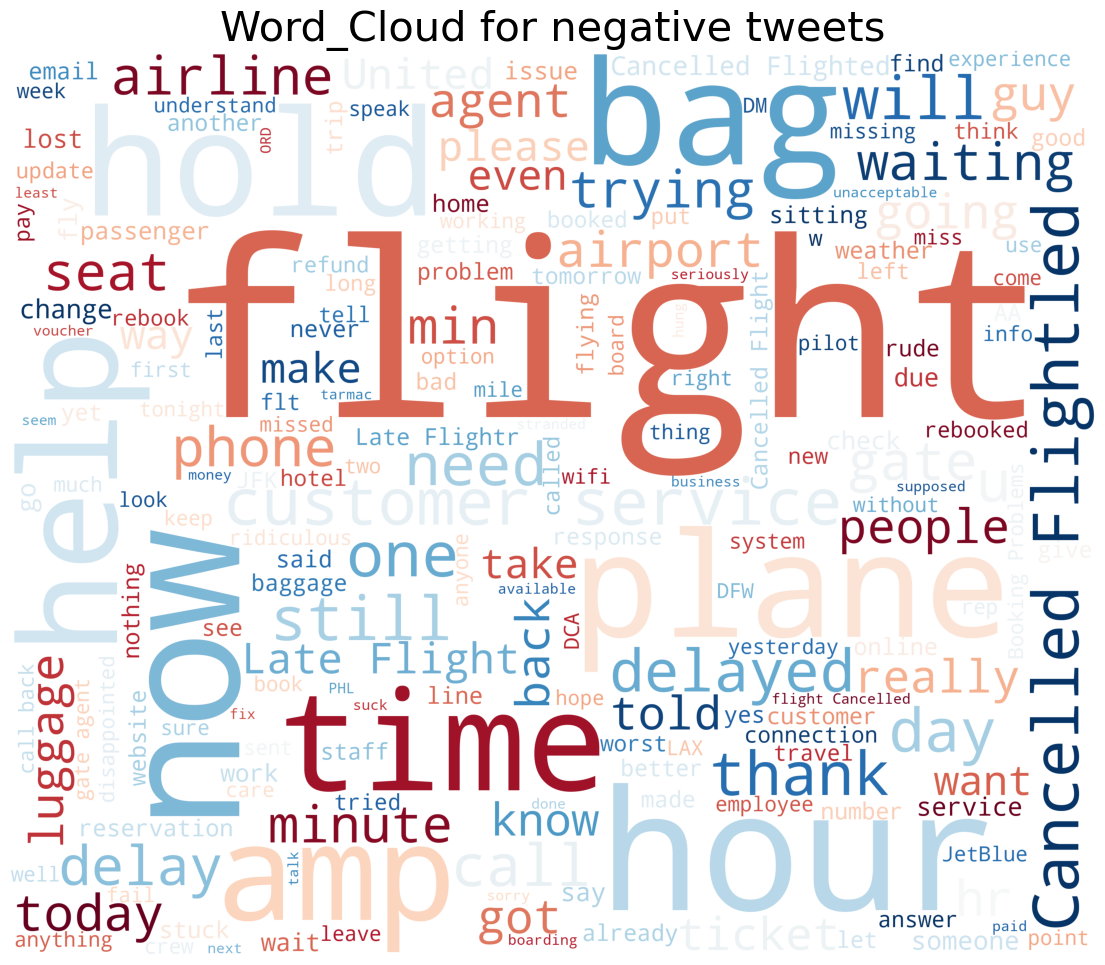

In [16]:
title = 'Word_Cloud for negative tweets'
plt.figure(1,figsize=(14, 14))
# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.title(title, fontsize=30)

plt.show()

#### Observation:
Flight, plane, customer, service, time, cancelled are some of the most frequent negative words.

#### Wordcloud for positive tweets

In [17]:
# Creating word cloud for positive tweets
# Extracting the negative tweets i.e, airline_sentiment = positive
airline_tweets=data[data['airline_sentiment']=='positive']
# joining the positive tweets using space seperator, helps to convert the all rows into one string
words = ' '.join(data['text'])
# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in words.split()
                           if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                                and len(word)>1])

In [18]:
# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords=STOPWORDS,
                      colormap = 'RdBu',
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)    # The generate() function takes one argument of the text we created, helps to generate the wordcloud


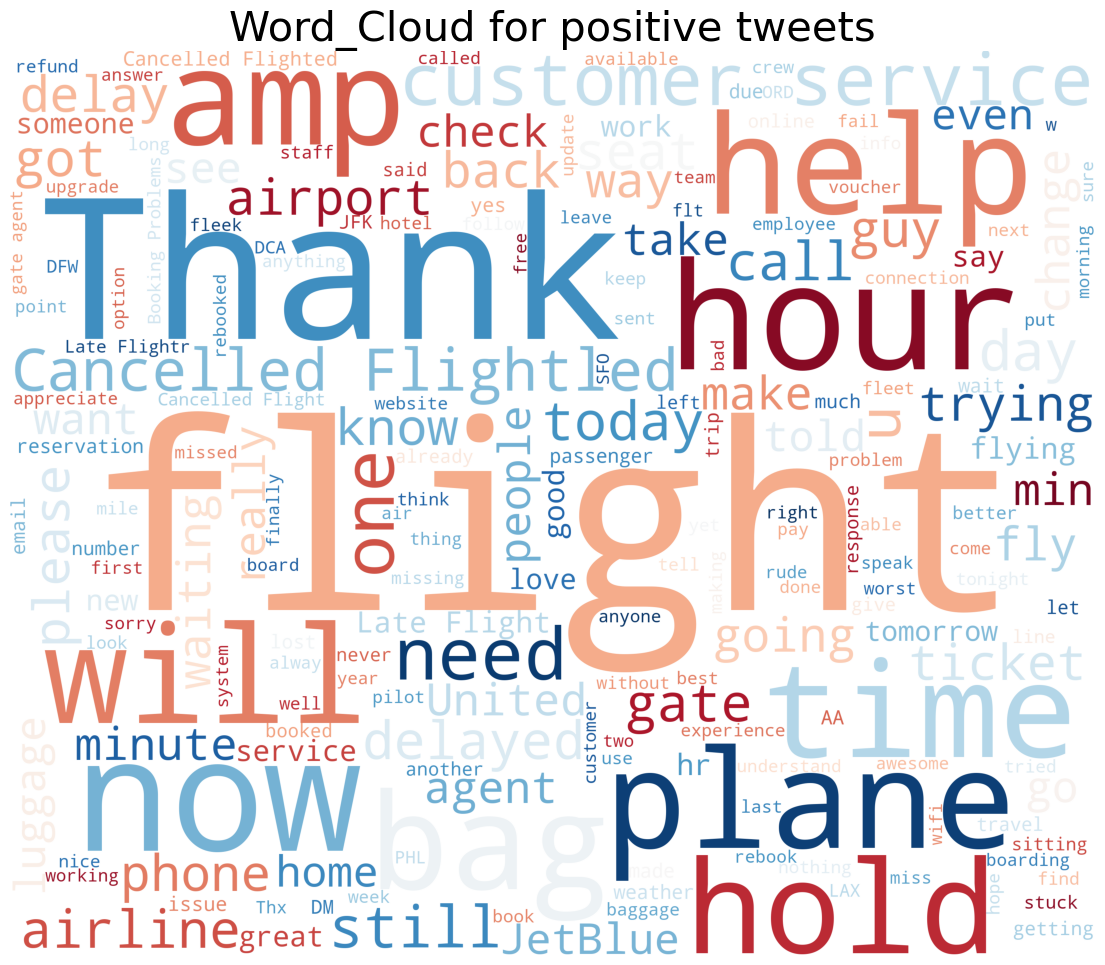

In [19]:
title = 'Word_Cloud for positive tweets'
plt.figure(1,figsize=(14, 14))
# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.title(title, fontsize=30)
plt.show()

#### Observation:
Flight, plane, customer, service, time, good, thank, need are some of the most frequent positives words.

## Data Preparation for Modeling

- Drop all unnecessary columns
- Remove html tags
- Replace contractions in string(e.g. replace I'm --> I am) and so on.\
- Remove numbers
- Tokenization
- To remove Stopwords
- Lemmatized data

# Take text and airline sentiment columns from the data

In [20]:
data = data[['text', 'airline_sentiment']]

In [21]:
data.head() 

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [22]:
data.tail() 

,text,airline_sentiment
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative
14639,@AmericanAir we have 8 ppl so we need 2 know h...,neutral


#### Observation:
All unnecessary columns were drop. Only text & airline sentiment are necessary.

In [23]:
data.shape   

(14640, 2)

In [24]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [25]:
data['airline_sentiment'].value_counts() 

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Remove HTML Tags

In [26]:
# Code to remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Suppress the warning message
warnings.filterwarnings("ignore", category=UserWarning)

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


#### Observation:
There the html tages are removed

### Replace contractions in string

In [27]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


#### Observation:
The contractions are replace in string

### Remove numbers

In [28]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)                     
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


#### Observation:
The numbers are removed from the text.

### Apply Tokenization

In [29]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)  # Tokenization of data
data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


#### Observation:
The data have been tokenized.

### Applying lowercase and removing stopwords and punctuation

In [30]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

**All the preprocessing steps in one function**

In [31]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica not today must mean need take an...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


#### Observation:
Non-ASCII characters are removed from list of tokenized words.
All characters are converted to lowercase from list of tokenized words.
Punctuation is removed from list of tokenized words.
Stop words is removed from list of tokenized words.

## Model Building

### Using countvectorizer

- Intialize countvectorizer and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from Count vectorizer and random forest model


### **Building the model based on CountVectorizer and Random Forest**

In [32]:
# Vectorization (Convert text data to numbers).

Count_vec = CountVectorizer(max_features=7000)             # Initialize the CountVectorizer function with max_ features = 7000.

data_features = Count_vec.fit_transform(data['text'])      # Fit and transform the count_vec variable on the text column

data_features = data_features.toarray()

In [33]:
data_features.shape

(14640, 7000)

In [34]:
data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Create train and test sets

In [35]:
X = data_features

In [36]:
y = data.airline_sentiment

# Split data into training and testing set.

In [37]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

#### Random Forest Model

In [38]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7202868852459017


#### Observation:
Random Forest Model has 72% of accuracy in training.

### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [39]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [40]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 7, scoring = 'accuracy')
    cv_scores.append(scores.mean())

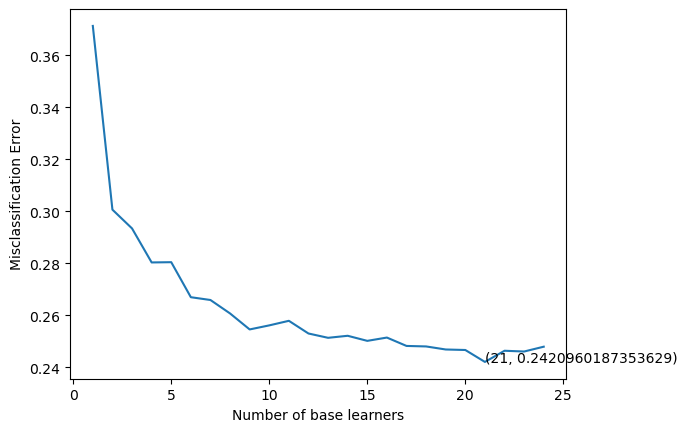

In [41]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

#### Observation:
The optimal number of n_estimator corresponds to minimum error is at 21 base learner & 0.2421 error.

In [42]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7723132969034608

#### Observation:
Random Forest Model has 77.23% of accuracy in test data.

#### Best Random Forest model

In [43]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

In [44]:
# Print and plot Confusion matrix to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

[[2563  184   67]
 [ 396  416   72]
 [ 169  112  413]]
0.7723132969034608


<Axes: >

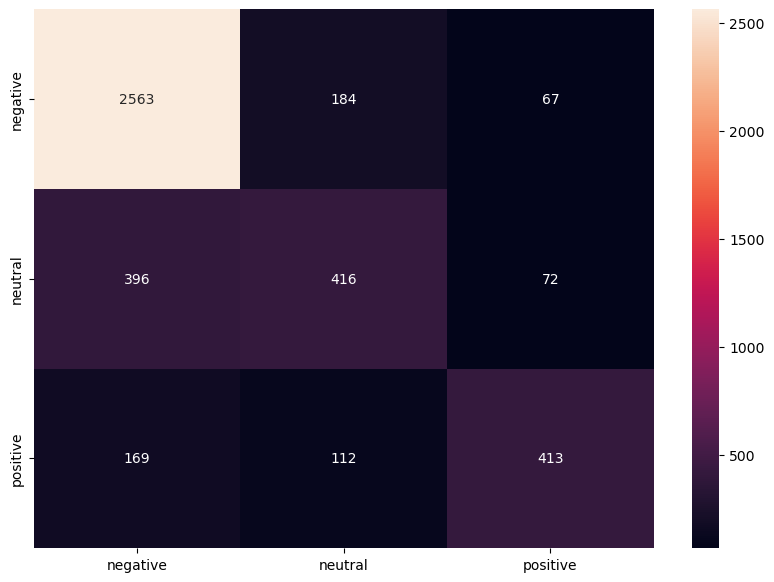

In [45]:
# Plot the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral', 'positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observation:
The accuracy of the randon Forest model Using countvectorizer is 77.23%. The model predicted 2563  negative, 416 neutra & 413 positive.

#### Wordcloud of top 20 important features from countvectorizer+Randomforest based model

In [46]:
all_features = Count_vec.get_feature_names_out()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 20 features into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:20]:
    top_features+=all_features[i]
    top_features+=' '
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)


thank not great jetblue flight delay http usairways southwestair love unite cancel hours get hold virginamerica bag americanair wait amaze 
 
 


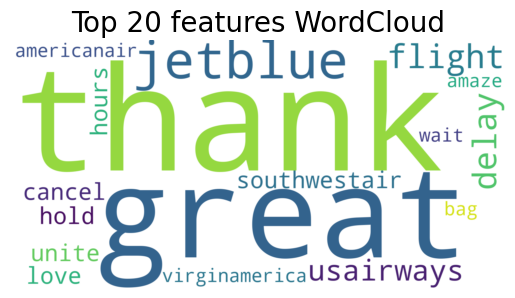

In [47]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 20 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

#### Observation:
The top 20 important features from countvectorizer+Randomforest based model are displayed in the wordcloud above such as thank, great, flight, delay, hours, jetblue, etc.

### Using TF-IDF (Term Frequency- Inverse Document Frequency)

- Intialize TFIDF and use it for vectorization
- Store Independent and Dependent variables
- Split the data into train and test
- Build a Random Forest model on train data
- Use Cross validation to validate the score and to find optimal n_estimators
- Plot the misclassification error for each of estimators
- Test the model on testing data
- Plot the Confusion matrix
plot word cloud for top 20 important features obtained from TFIDF and random forest model


**Term Frequency -  Inverse Document Frequency:** It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [48]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=7000)
data_features = tfidf_vect.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 7000)

#### Create train and test sets

In [49]:
X = data_features

y = data.airline_sentiment

In [50]:
# Split data into training and testing set.

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

#### Random Forest Model

In [51]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.71448087431694


#### Observation:
Random Forest Model has 71.45%

#### Optimize the parameter: The number of trees in the random forest model(n_estimators)

In [52]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [53]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 7, scoring = 'accuracy')
    cv_scores.append(scores.mean())

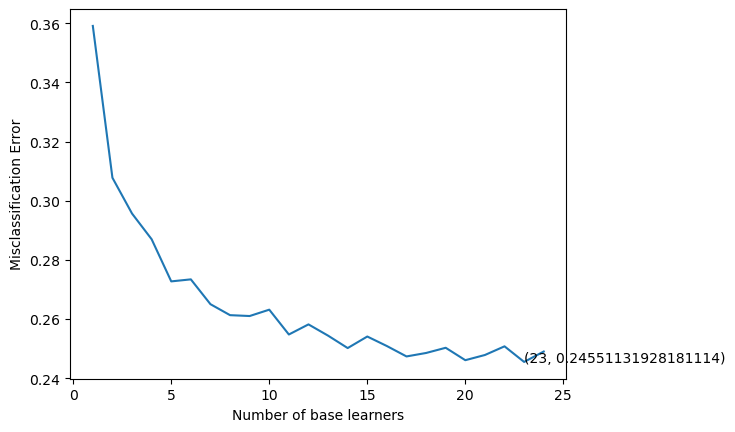

In [54]:
# plot the error as k increases
error = [1 - x for x in cv_scores]                                 # Error corresponds to each number of estimator
optimal_learners = base_ln[error.index(min(error))]                # Selection of optimal number of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           # Plot between each number of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

#### Observation:
The optimal number of n_estimator corresponds to minimum error is at 23 base learner & 0.2455 error.

In [55]:
# Train the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)                     # Initialize the Random Forest classifier with optimal learners
clf.fit(X_train, y_train)                                               # Fit the classifer on X_train and y_train
clf.score(X_test, y_test)                                               # Find the score on X_train and y_train

0.7714025500910747

#### Observation:
The accuracy on test data is 77.14% accuracy in test data.

#### Best Random Forest model

In [56]:
# Predict the result for test data using the model built above.
result = clf.predict(X_test)                                   # Predict the X_test data using the model built above (forest)
print(classification_report(y_test , result , target_names = ['negative', 'neutral', 'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,result))

              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      2814
     neutral       0.62      0.40      0.49       884
    positive       0.81      0.54      0.65       694

    accuracy                           0.77      4392
   macro avg       0.74      0.63      0.67      4392
weighted avg       0.76      0.77      0.75      4392

Accuracy of the model is :  0.7714025500910747


In [57]:
# Print and plot Confusion matrix to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

[[2657  124   33]
 [ 475  357   52]
 [ 226   94  374]]
0.7714025500910747


<Axes: >

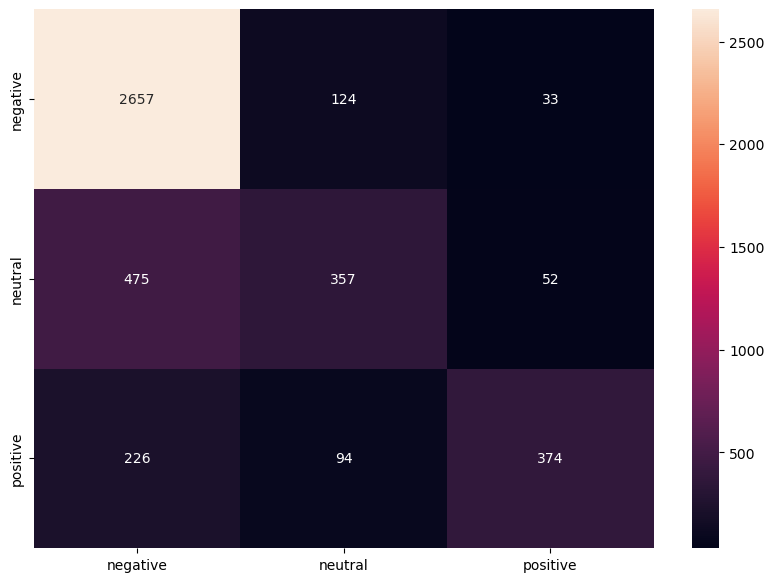

In [58]:
# Plot the confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral', 'positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observation:
The accuracy of the randon Forest model Using TF-IDF is 77.14%. The model predicted 2657 negative, 357 neutral & 374 positive.

## Wordcloud of top 20 important features from countvectorizer+Randomforest based mode

In [59]:
all_features = Count_vec.get_feature_names_out()                     # Instantiate the feature from the vectorizer
top_features=''                                                  # Addition of top 20 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:20]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

# Applying wordcloud on top features
wordcloud = WordCloud(background_color="white",width=2000,height=1000).generate(top_features)

thank,not,jetblue,southwestair,unite,usairways,americanair,great,flight,http,delay,love,hours,virginamerica,get,cancel,dm,awesome,hold,call,
 
 


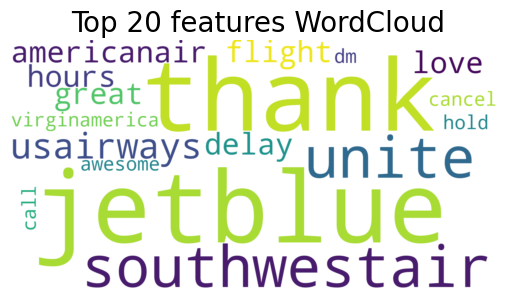

In [60]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 20 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

#### Observation:
The top 20 important features from countvectorizer+Randomforest based model are displayed in the wordcloud above such as thank, great, flight, jetblue, hour, love, unite, etc.

### Using LSTM

- Tokenize the text column
- Encode the target variable
- Split the data into train and test
- Train the LSTM model
- Test the model on train and test data
- Plot the confusion matrix

In [61]:
# Clearing backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

#### Tokenizing the text column

In [62]:
tokenizer = Tokenizer(num_words =1000, split = ' ')

# Fit tokenizer on text data
tokenizer.fit_on_texts(data['text'].values)

# Converting text to sequences
X = tokenizer.texts_to_sequences(data['text'].values)

# Padding the sequences
X = pad_sequences(X)

#### Encoding the target variable

In [63]:
# Storing the Label Binarizer
enc = LabelBinarizer()
# Fitting the Label Binarizer on airline_sentiment
y_encoded = enc.fit_transform(data['airline_sentiment'])

#### Split the data into train and test

In [64]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.30, random_state = 42)

#### Training LSTM Model

In [65]:
# Initializing the model
model = Sequential()

# Adding the embedding layer with 1000 vocabularies, 256 neurons
model.add(Embedding(input_dim=1000, output_dim=256, input_length = X.shape[1]))

model.add(SpatialDropout1D(0.1))

# Adding the LSTM layer with 256 neurons
model.add(LSTM(256,return_sequences=True))

# return_sequences = True means each LSTM cell in it is outputting its value.The output of the layer is a sequence of outputs.
model.add(LSTM(150, dropout = 0.1, recurrent_dropout = 0.1))

# Adding a dense layer with 256 neurons and relu activation function
model.add(Dense(256,activation = 'relu'))

# Adding a dense layer with 128 neurons and relu activation function
model.add(Dense(128,activation = 'relu'))

# Adding a dense layer with 64 neurons and relu activation function
model.add(Dense(64,activation = 'relu'))

# Adding the output layer with 3 neurons and softmax activation function
model.add(Dense(3, activation = 'softmax'))

# Compile the model with categorical_crossentropy as loss function, accuracy as metrics and adam as optimizer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [66]:
# Summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 21, 256)           256000    
                                                                 
 spatial_dropout1d (Spatial  (None, 21, 256)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 21, 256)           525312    
                                                                 
 lstm_1 (LSTM)               (None, 150)               244200    
                                                                 
 dense (Dense)               (None, 256)               38656     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

## A sequential model is constructed by adding various layers to it.

- The first layer is the Embedding layer which transforms one-hot encoded sparse vectors into Word Embedding vectors. As the model continues to train, the weights of the Embedding layer are adjusted so that words with similar meanings are located closer together in the vector space, or have similar Word Embedding Vectors. For example, "Thank" would be located near "great" and "cancel" would be near "delay" The vocabulary size is specified.

- The subsequent layer is an LSTM layer with 256 neurons. The input for this layer is a list of sentences, where each word has been converted to its corresponding Embedding vector and padded to have the same length.

- The subsequent layer is an LSTM layer with 150 neurons and drop out of 0.1. The activation function used is ReLU, which is widely used, but other relevant activation functions can also be used.

- A Dense layer is added with 256 neurons and RelU as activation function.

- A Dense layer is added with 128 neurons and RelU as activation function.

- A Dense layer is added with 64 neurons and RelU as activation function.

- The final layer is a Dense layer which serves as the output layer and has 3 cells to perform classification, representing the 3 different categories in this example positive, negative amd neutral.

- The model is then compiled using the Adam optimizer and categorical cross-entropy. The Adam optimizer is currently the best choice for handling sparse gradients and noisy problems, and categorical cross-entropy is typically used when the classes are mutually exclusive, meaning each sample belongs to exactly one class.

In [67]:
%%time
#  Code to fit the model on X_train and y_train with epochs as 35, batch size as 48
his = model.fit(X_train, y_train, epochs = 35, batch_size = 48, verbose = 'auto')

Epoch 1/35
214/214 [==============================] - 23s 87ms/step - loss: 0.7097 - accuracy: 0.6962
Epoch 2/35
214/214 [==============================] - 19s 88ms/step - loss: 0.5317 - accuracy: 0.7888
Epoch 3/35
214/214 [==============================] - 19s 89ms/step - loss: 0.4692 - accuracy: 0.8151
Epoch 4/35
214/214 [==============================] - 19s 88ms/step - loss: 0.4433 - accuracy: 0.8241
Epoch 5/35
214/214 [==============================] - 20s 94ms/step - loss: 0.4097 - accuracy: 0.8371
Epoch 6/35
214/214 [==============================] - 20s 92ms/step - loss: 0.3811 - accuracy: 0.8509
Epoch 7/35
214/214 [==============================] - 19s 90ms/step - loss: 0.3572 - accuracy: 0.8603
Epoch 8/35
214/214 [==============================] - 20s 92ms/step - loss: 0.3182 - accuracy: 0.8748
Epoch 9/35
214/214 [==============================] - 20s 92ms/step - loss: 0.2922 - accuracy: 0.8892
Epoch 10/35
214/214 [==============================] - 19s 91ms/step - loss: 0.266

**Plotting the model**

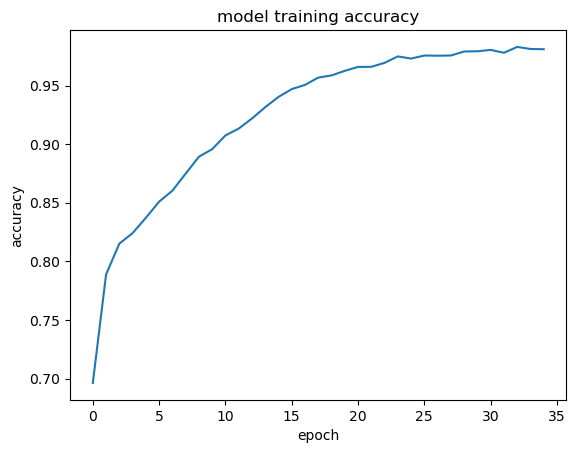

In [68]:
# accessing the accuracy from the his variable
plt.plot(his.history['accuracy'])
# setting the title 
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

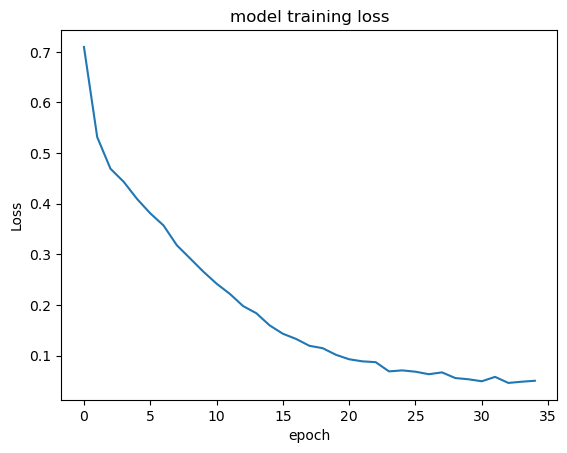

In [69]:
# accessing the loss from the his variable
plt.plot(his.history['loss'])
# setting the title
plt.title('model training loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

#### Observations:

We can observe from the above graphs that the accuracy is got improved from the 0.7005 to 0.9816 in 35 epochs using LSTM
The training loss got reduced from the 0.7071 to 0.0523 using LSTM

**Evaluating the model on the test data**

In [70]:
model.evaluate(X_test,y_test)

138/138 [==============================] - 5s 31ms/step - loss: 2.1786 - accuracy: 0.7596


[2.178563356399536, 0.7595628499984741]

#### Observation:
The accuracy on test data is 76%

In [71]:
# Predicting on X_test using the above model
result = model.predict(X_test)

138/138 [==============================] - 4s 29ms/step


In [72]:
# Applying argmax function on the predicted values (result) to get the categorical predicted labels
y_pred_arg=np.argmax(result,axis=1)
# Applying argmax function on the y_test to get back the categorical predicted labels
y_test_arg=np.argmax(y_test,axis=1)

**Plotting the confusion matrix**

<Axes: >

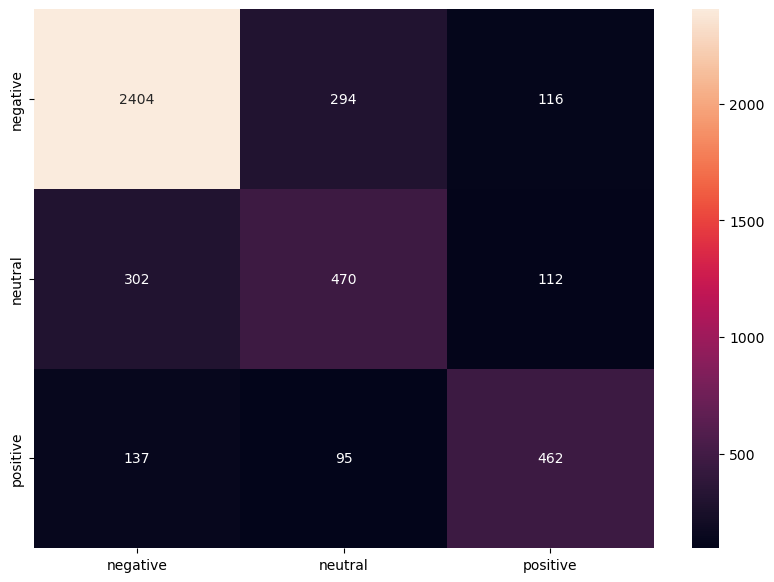

In [73]:
conf_mat = confusion_matrix(y_test_arg, y_pred_arg)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral', 'positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observation:
The accuracy using LSTM is 76%. The model predicted 2404 negative, 470 neutral & 462 positive.

### Summary of key performance metrics for training and test data in tabular format for comparison

In [74]:
pd.DataFrame({'Models':['Random Forest based on CountVectorizer Model 1','Random Forest based on TfidfVectorizer Model 2', ' LSTM model 3'],'Test Accuracy':['77.23%','77.14%','76%']})

,Models,Test Accuracy
0,Random Forest based on CountVectorizer Model 1,77.23%
1,Random Forest based on TfidfVectorizer Model 2,77.14%
2,LSTM model 3,76%


## Summary

---
- We used a dataset which has **tweets in text format and their sentiment into the positive, neutral & negative.**
- The goal was to **build a sentimental analysis model that classify the sentiment of tweets into the positive, neutral & negative.**.
- We **pre-processed the data** using various techniques and libraries like Drop all unnecessary columns, Remove html tags, Replace contractions in string(e.g. replace I'm --> I am), Remove numbers, Tokenization, remove Stopwords & Lemmatized data.
- We **use Univariate Analysis to find the percentage of tweets for each airline, the distribution of sentiments across all the tweets & what indicate the negative reasons.
- We **use Bivariate Analysis to find the distribution of sentiments of tweets for each airline.
- We **created a Word Cloud plot** based on positive and negative tweets.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the Randon Forest model using countervectorizer & TfidfVectorizer.
- We trained the model and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.
- We use LSTM
- The text column was Tokenized and the tweets was converted into numerical vectors.
- The target variable was encoded using LabelBinarizer.
- We trained & fit the model with 35 epochs
- After building the LSTM model, we **evaluate & predicted the results for the test data.**


## Recomendations
- The US Airline business can benefit by building a sentimental analysis model that classify the sentiment of tweets into the positive, neutral & negative by the use of normal Supervised learning Algorithms like Random Forest using CountVectorizer model 1 or Random Forest using TF-IDF model 2.
- We can also increase the accuracy of the model by increasing **max_feature parameter** in the vectorizer. 
- We can apply **other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further.

## Conclusion

LSTM accuracy result is lower than Random Forest based on CountVectorizer & TfidfVectorizer.
There is usually a trade-off between accuracy and computation. LSTM is good at remembering previous text sequences, and combining it with pretrained Word Embeddings like Word2Vec, GLoVe, and other CountVectorizer can produce good sentiment analysis results. But training LSTM model takes much longer than normal Supervised learning Algorithms like Random Forest using TF-IDF.

## Happy Learning!